<a href="https://colab.research.google.com/github/Soloskey1/LLM_Premiere_Project_HDSC_SPRING_24/blob/africa/Malaria_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/HAMOYE SPRING'24/archive (3)/DatasetAfricaMalaria.csv")
df

,Country Name,Year,Country Code,"Incidence of malaria (per 1,000 population at risk)",Malaria cases reported,Use of insecticide-treated bed nets (% of under-5 population),Children with fever receiving antimalarial drugs (% of children under age 5 with fever),Intermittent preventive treatment (IPT) of malaria in pregnancy (% of pregnant women),People using safely managed drinking water services (% of population),"People using safely managed drinking water services, rural (% of rural population)",...,Urban population growth (annual %),People using at least basic drinking water services (% of population),"People using at least basic drinking water services, rural (% of rural population)","People using at least basic drinking water services, urban (% of urban population)",People using at least basic sanitation services (% of population),"People using at least basic sanitation services, rural (% of rural population)","People using at least basic sanitation services, urban (% of urban population)",latitude,longitude,geometry
0,Algeria,2007,DZA,0.01,26.0,NaN,NaN,NaN,NaN,NaN,...,2.71,91.68,85.83,94.78,85.85,76.94,90.57,28.033886,1.659626,POINT (28.033886 1.659626)
1,Angola,2007,AGO,286.72,1533485.0,18.0,29.8,1.5,NaN,NaN,...,5.01,47.96,23.77,65.83,37.26,14.00,54.44,-11.202692,17.873887,POINT (-11.202692 17.873887)
2,Benin,2007,BEN,480.24,0.0,NaN,NaN,NaN,NaN,NaN,...,4.09,63.78,54.92,76.24,11.80,4.29,22.36,9.307690,2.315834,POINT (9.307689999999999 2.315834)
3,Botswana,2007,BWA,1.03,390.0,NaN,NaN,NaN,NaN,NaN,...,4.80,78.89,57.60,94.35,61.60,39.99,77.30,-22.328474,24.684866,POINT (-22.328474 24.684866)
4,Burkina Faso,2007,BFA,503.80,44246.0,NaN,NaN,NaN,NaN,NaN,...,5.91,52.27,45.13,76.15,15.60,6.38,46.49,12.238333,-1.561593,POINT (12.238333 -1.561593)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
589,Togo,2017,TGO,278.20,1755577.0,69.7,31.1,41.7,NaN,NaN,...,3.79,65.13,48.39,89.06,16.13,7.40,28.61,8.619543,0.824782,POINT (8.619543 0.824782)
590,Tunisia,2017,TUN,NaN,NaN,NaN,NaN,NaN,92.66,NaN,...,1.57,96.25,88.71,99.70,90.92,81.35,95.29,33.886917,9.537499,POINT (33.886917 9.537499)
591,Uganda,2017,UGA,336.76,11667831.0,NaN,NaN,NaN,7.07,4.46,...,6.25,49.10,41.25,75.11,18.47,16.17,26.11,1.373333,32.290275,POINT (1.373333 32.290275)
592,Zambia,2017,ZMB,160.05,5505639.0,NaN,NaN,NaN,NaN,NaN,...,4.21,59.96,41.95,83.86,26.37,18.93,36.24,-13.133897,27.849332,POINT (-13.133897 27.849332)


In [33]:
country_names_column = df['Country Name']
unique_country_names = country_names_column.unique()
print("Unique country names:")
for country_name in unique_country_names:
  print(country_name)

len(unique_country_names)

Unique country names:
Algeria
Angola
Benin
Botswana
Burkina Faso
Burundi
Cabo Verde
Cameroon
Central African Republic
Chad
Comoros
Congo, Dem. Rep.
Congo, Rep.
Cote d'Ivoire
Djibouti
Egypt, Arab Rep.
Equatorial Guinea
Eritrea
Eswatini
Ethiopia
Gabon
Gambia, The
Ghana
Guinea
Guinea-Bissau
Kenya
Lesotho
Liberia
Libya
Madagascar
Malawi
Mali
Mauritania
Mauritius
Morocco
Mozambique
Namibia
Niger
Nigeria
Rwanda
Sao Tome and Principe
Senegal
Seychelles
Sierra Leone
Somalia
South Africa
South Sudan
Sudan
Tanzania
Togo
Tunisia
Uganda
Zambia
Zimbabwe


54

So there are 54 country.

**Malaria Incidence Analysis:**
1. Analyze trends in malaria incidence over time (using the 'Year' column) and across different countries ('Country Name' and 'Country Code').
2. Investigate the relationship between reported malaria cases and the use of insecticide-treated bed nets, intermittent preventive treatment during pregnancy, and other malaria prevention measures.
3. Assess the availability and quality of drinking water and sanitation services across different regions and countries, and judge whether the lack of sanitation and unfit drinking water has an impact on increased cases of malaria.
4. Compare urban and rural populations' access to safely managed drinking water and sanitation services


1. malaria cases reported
2. Driking water
3. children
4. ITP in malaria
5. Sanitation services


In [34]:
column_names = df.columns.tolist()
column_names

['Country Name',
 'Year',
 'Country Code',
 'Incidence of malaria (per 1,000 population at risk)',
 'Malaria cases reported',
 'Use of insecticide-treated bed nets (% of under-5 population)',
 'Children with fever receiving antimalarial drugs (% of children under age 5 with fever)',
 'Intermittent preventive treatment (IPT) of malaria in pregnancy (% of pregnant women)',
 'People using safely managed drinking water services (% of population)',
 'People using safely managed drinking water services, rural (% of rural population)',
 'People using safely managed drinking water services, urban (% of urban population)',
 'People using safely managed sanitation services (% of population)',
 'People using safely managed sanitation services, rural (% of rural population)',
 'People using safely managed sanitation services, urban  (% of urban population)',
 'Rural population (% of total population)',
 'Rural population growth (annual %)',
 'Urban population (% of total population)',
 'Urban popu

In [35]:
abbreviated_headers = {
  'Country Name' : 'countryname',
  'Year' : 'year',
  'Country Code' : 'countrycode',
  'Incidence of malaria (per 1,000 population at risk)' : 'iom(/1,000 pop)' ,
  'Malaria cases reported' : 'malariacasesreported',
  'Use of insecticide-treated bed nets (% of under-5 population)' : 'insecticidetreatednet(%juvenile)',
  'Children with fever receiving antimalarial drugs (% of children under age 5 with fever)' : 'treatment_antimalarialdrugs(%juvenile)',
  'Intermittent preventive treatment (IPT) of malaria in pregnancy (% of pregnant women)' : 'ipt_malaria(%pregnantwomen)',
  'People using safely managed drinking water services (% of population)' : 'safemanaged_drinkwater(%pop)',
  'People using safely managed drinking water services, rural (% of rural population)' : 'safemanaged_drinkwater_rural(%pop)',
  'People using safely managed drinking water services, urban (% of urban population)' : 'safemanaged_drinkwater_urban(%pop)',
  'People using safely managed sanitation services (% of population)' : 'safesanitationservices(%pop)',
  'People using safely managed sanitation services, rural (% of rural population)' : 'safesanitationservices_rural(%ruralpop)',
  'People using safely managed sanitation services, urban  (% of urban population)' : 'safesanitationservices_urban(%urbanpop)',
  'Rural population (% of total population)' : 'ruralpop(%totalpop)',
  'Rural population growth (annual %)' : 'ruralpopgrowth(annual%)',
  'Urban population (% of total population)' : 'urbanpop(%totalpop)',
  'Urban population growth (annual %)' : 'urbanpopgrowth(annual%)',
  'People using at least basic drinking water services (% of population)' : 'basicdrinkingwaterservices(%pop)',
  'People using at least basic drinking water services, rural (% of rural population)' : 'basicdrinkingwater_rural(%ruralpop)',
  'People using at least basic drinking water services, urban (% of urban population)' : 'basicdrinkingwater_urban(%urbanpop)',
  'People using at least basic sanitation services (% of population)' : 'bascisanitationservices(%pop)',
  'People using at least basic sanitation services, rural (% of rural population)' : 'bascisanitationservices_rural(%ruralpop)',
  'People using at least basic sanitation services, urban  (% of urban population)' :  'bascisanitationservices_urban(%urbanpop)',
  'latitude' : 'latitude',
  'longitude' : 'longitude',
  'geometry' : 'geometry'
}
df.rename(columns=abbreviated_headers, inplace=True)
df.head()

,countryname,year,countrycode,"iom(/1,000 pop)",malariacasesreported,insecticidetreatednet(%juvenile),treatment_antimalarialdrugs(%juvenile),ipt_malaria(%pregnantwomen),safemanaged_drinkwater(%pop),safemanaged_drinkwater_rural(%pop),...,urbanpopgrowth(annual%),basicdrinkingwaterservices(%pop),basicdrinkingwater_rural(%ruralpop),basicdrinkingwater_urban(%urbanpop),bascisanitationservices(%pop),bascisanitationservices_rural(%ruralpop),bascisanitationservices_urban(%urbanpop),latitude,longitude,geometry
0,Algeria,2007,DZA,0.01,26.0,NaN,NaN,NaN,NaN,NaN,...,2.71,91.68,85.83,94.78,85.85,76.94,90.57,28.033886,1.659626,POINT (28.033886 1.659626)
1,Angola,2007,AGO,286.72,1533485.0,18.0,29.8,1.5,NaN,NaN,...,5.01,47.96,23.77,65.83,37.26,14.00,54.44,-11.202692,17.873887,POINT (-11.202692 17.873887)
2,Benin,2007,BEN,480.24,0.0,NaN,NaN,NaN,NaN,NaN,...,4.09,63.78,54.92,76.24,11.80,4.29,22.36,9.307690,2.315834,POINT (9.307689999999999 2.315834)
3,Botswana,2007,BWA,1.03,390.0,NaN,NaN,NaN,NaN,NaN,...,4.80,78.89,57.60,94.35,61.60,39.99,77.30,-22.328474,24.684866,POINT (-22.328474 24.684866)
4,Burkina Faso,2007,BFA,503.80,44246.0,NaN,NaN,NaN,NaN,NaN,...,5.91,52.27,45.13,76.15,15.60,6.38,46.49,12.238333,-1.561593,POINT (12.238333 -1.561593)


In [36]:
df.isnull().sum()

countryname                                   0
year                                          0
countrycode                                   0
iom(/1,000 pop)                              44
malariacasesreported                         44
insecticidetreatednet(%juvenile)            462
treatment_antimalarialdrugs(%juvenile)      472
ipt_malaria(%pregnantwomen)                 488
safemanaged_drinkwater(%pop)                495
safemanaged_drinkwater_rural(%pop)          506
safemanaged_drinkwater_urban(%pop)          418
safesanitationservices(%pop)                462
safesanitationservices_rural(%ruralpop)     484
safesanitationservices_urban(%urbanpop)     462
ruralpop(%totalpop)                           6
ruralpopgrowth(annual%)                       6
urbanpop(%totalpop)                           6
urbanpopgrowth(annual%)                       6
basicdrinkingwaterservices(%pop)              6
basicdrinkingwater_rural(%ruralpop)          28
basicdrinkingwater_urban(%urbanpop)     

There are so many null Values in the 3 particular column so we can't get anything concrete out of it those are :

insecticidetreatednet(%juvenile)            462

treatment_antimalarialdrugs(%juvenile)      472

ipt_malaria(%pregnantwomen)                 488

Similarly we can't say anything about safe managed drinking water and safe managed sanitation as there are also many null values :

safemanaged_drinkwater(%pop)                495

safemanaged_drinkwater_rural(%pop)          506

safemanaged_drinkwater_urban(%pop)          418

safesanitationservices(%pop)                462

safesanitationservices_rural(%ruralpop)     484

safesanitationservices_urban(%urbanpop)     462


In [38]:
df.describe()

,year,"iom(/1,000 pop)",malariacasesreported,insecticidetreatednet(%juvenile),treatment_antimalarialdrugs(%juvenile),ipt_malaria(%pregnantwomen),safemanaged_drinkwater(%pop),safemanaged_drinkwater_rural(%pop),safemanaged_drinkwater_urban(%pop),safesanitationservices(%pop),...,urbanpop(%totalpop),urbanpopgrowth(annual%),basicdrinkingwaterservices(%pop),basicdrinkingwater_rural(%ruralpop),basicdrinkingwater_urban(%urbanpop),bascisanitationservices(%pop),bascisanitationservices_rural(%ruralpop),bascisanitationservices_urban(%urbanpop),latitude,longitude
count,594.000000,550.000000,5.500000e+02,132.000000,122.000000,106.000000,99.000000,88.000000,176.000000,132.000000,...,588.000000,588.000000,588.000000,566.000000,566.000000,588.000000,566.000000,566.000000,594.000000,594.000000
mean,2012.000000,190.087491,1.068330e+06,42.530303,30.201639,15.013958,33.478990,12.470568,51.549545,28.768939,...,43.164116,3.523061,65.994915,51.449576,84.268498,39.469796,28.077208,48.088375,2.828796,17.342546
std,3.164943,163.054527,2.192802e+06,20.157059,18.903198,12.389166,26.678321,10.078371,24.157416,18.631510,...,18.086118,1.456244,17.283361,18.927868,9.307285,26.304934,24.046725,21.802128,15.678226,20.041257
min,2007.000000,0.000000,0.000000e+00,1.000000,0.500000,0.000000,5.770000,0.930000,11.200000,6.370000,...,9.860000,-4.650000,28.960000,17.050000,52.010000,4.990000,1.890000,12.580000,-30.559482,-24.013197
25%,2009.000000,30.857500,2.211750e+03,26.675000,17.275000,5.763285,8.975000,4.185000,34.125000,16.532500,...,28.795000,2.512500,52.375000,37.075000,78.080000,18.197500,8.842500,30.775000,-6.369028,0.824782
50%,2012.000000,174.775000,1.130260e+05,42.900000,29.300000,11.500000,28.390000,10.675000,51.365000,25.410000,...,41.560000,3.730000,64.470000,50.435000,85.420000,32.555000,18.815000,44.695000,6.744051,18.611308
75%,2015.000000,347.637500,1.154808e+06,56.325000,42.625000,21.850000,43.890000,16.887500,70.747500,35.725000,...,56.945000,4.450000,79.165000,62.245000,90.082500,54.810000,38.082500,58.845000,12.862807,31.465866
max,2017.000000,585.540000,1.682113e+07,95.500000,76.900000,59.600000,92.660000,39.930000,89.540000,78.120000,...,88.980000,7.400000,99.870000,99.830000,99.920000,100.000000,95.180000,98.300000,33.886917,57.552152


In [39]:
# Calculate the percentage of null values in each column
null_percentage = (df.isnull().sum() / len(df)) * 100

# Get the list of columns where null percentage exceeds 70%
columns_to_drop = null_percentage[null_percentage > 70].index

# Drop columns with more than 70% null values
# df1 is the dataframe with columns having less null value here less than 70%
df1 = df.drop(columns=columns_to_drop)


In [40]:
df1.isnull().sum()

countryname                                  0
year                                         0
countrycode                                  0
iom(/1,000 pop)                             44
malariacasesreported                        44
ruralpop(%totalpop)                          6
ruralpopgrowth(annual%)                      6
urbanpop(%totalpop)                          6
urbanpopgrowth(annual%)                      6
basicdrinkingwaterservices(%pop)             6
basicdrinkingwater_rural(%ruralpop)         28
basicdrinkingwater_urban(%urbanpop)         28
bascisanitationservices(%pop)                6
bascisanitationservices_rural(%ruralpop)    28
bascisanitationservices_urban(%urbanpop)    28
latitude                                     0
longitude                                    0
geometry                                     0
dtype: int64

In [41]:
# Calculate the mean for numerical columns
numerical_columns = df1.select_dtypes(include=['float64', 'int64']).columns
numerical_means = df1[numerical_columns].mean()

# Fill null values in numerical columns with mean
df1[numerical_columns] = df1[numerical_columns].fillna(numerical_means)

In [42]:
df1.isnull().sum()

countryname                                 0
year                                        0
countrycode                                 0
iom(/1,000 pop)                             0
malariacasesreported                        0
ruralpop(%totalpop)                         0
ruralpopgrowth(annual%)                     0
urbanpop(%totalpop)                         0
urbanpopgrowth(annual%)                     0
basicdrinkingwaterservices(%pop)            0
basicdrinkingwater_rural(%ruralpop)         0
basicdrinkingwater_urban(%urbanpop)         0
bascisanitationservices(%pop)               0
bascisanitationservices_rural(%ruralpop)    0
bascisanitationservices_urban(%urbanpop)    0
latitude                                    0
longitude                                   0
geometry                                    0
dtype: int64

In [43]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594 entries, 0 to 593
Data columns (total 18 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   countryname                               594 non-null    object 
 1   year                                      594 non-null    int64  
 2   countrycode                               594 non-null    object 
 3   iom(/1,000 pop)                           594 non-null    float64
 4   malariacasesreported                      594 non-null    float64
 5   ruralpop(%totalpop)                       594 non-null    float64
 6   ruralpopgrowth(annual%)                   594 non-null    float64
 7   urbanpop(%totalpop)                       594 non-null    float64
 8   urbanpopgrowth(annual%)                   594 non-null    float64
 9   basicdrinkingwaterservices(%pop)          594 non-null    float64
 10  basicdrinkingwater_rural(%ruralpop)   

In [44]:
# Our Prepared Data
malaria=df1
malaria.describe()

,year,"iom(/1,000 pop)",malariacasesreported,ruralpop(%totalpop),ruralpopgrowth(annual%),urbanpop(%totalpop),urbanpopgrowth(annual%),basicdrinkingwaterservices(%pop),basicdrinkingwater_rural(%ruralpop),basicdrinkingwater_urban(%urbanpop),bascisanitationservices(%pop),bascisanitationservices_rural(%ruralpop),bascisanitationservices_urban(%urbanpop),latitude,longitude
count,594.000000,594.000000,5.940000e+02,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000
mean,2012.000000,190.087491,1.068330e+06,56.836650,1.389371,43.164116,3.523061,65.994915,51.449576,84.268498,39.469796,28.077208,48.088375,2.828796,17.342546
std,3.164943,156.888708,2.109882e+06,17.994596,1.193608,17.994387,1.448858,17.195701,18.475601,9.084895,26.171519,23.472147,21.281183,15.678226,20.041257
min,2007.000000,0.000000,0.000000e+00,11.020000,-3.450000,9.860000,-4.650000,28.960000,17.050000,52.010000,4.990000,1.890000,12.580000,-30.559482,-24.013197
25%,2009.000000,35.355000,3.705750e+03,43.635000,0.412500,29.627500,2.522500,52.517500,37.465000,78.387500,18.272500,9.050000,31.142500,-6.369028,0.824782
50%,2012.000000,190.087491,2.014490e+05,58.405000,1.660000,41.595000,3.725000,64.620000,51.365000,84.905000,33.115000,19.895000,45.465000,6.744051,18.611308
75%,2015.000000,337.367500,1.068330e+06,70.372500,2.127500,56.365000,4.435000,78.942500,61.405000,89.865000,54.515000,36.640000,57.627500,12.862807,31.465866
max,2017.000000,585.540000,1.682113e+07,90.140000,7.090000,88.980000,7.400000,99.870000,99.830000,99.920000,100.000000,95.180000,98.300000,33.886917,57.552152


In [47]:
unique_country_names = malaria['countryname'].unique()

# Total number of unique country names
total_unique_countries = len(unique_country_names)

print("Total unique country names:", total_unique_countries)
print("Unique country names:", unique_country_names)

Total unique country names: 54
Unique country names: ['Algeria' 'Angola' 'Benin' 'Botswana' 'Burkina Faso' 'Burundi'
 'Cabo Verde' 'Cameroon' 'Central African Republic' 'Chad' 'Comoros'
 'Congo, Dem. Rep.' 'Congo, Rep.' "Cote d'Ivoire" 'Djibouti'
 'Egypt, Arab Rep.' 'Equatorial Guinea' 'Eritrea' 'Eswatini' 'Ethiopia'
 'Gabon' 'Gambia, The' 'Ghana' 'Guinea' 'Guinea-Bissau' 'Kenya' 'Lesotho'
 'Liberia' 'Libya' 'Madagascar' 'Malawi' 'Mali' 'Mauritania' 'Mauritius'
 'Morocco' 'Mozambique' 'Namibia' 'Niger' 'Nigeria' 'Rwanda'
 'Sao Tome and Principe' 'Senegal' 'Seychelles' 'Sierra Leone' 'Somalia'
 'South Africa' 'South Sudan' 'Sudan' 'Tanzania' 'Togo' 'Tunisia' 'Uganda'
 'Zambia' 'Zimbabwe']


EDA

In [55]:
malaria

,countryname,year,countrycode,"iom(/1,000 pop)",malariacasesreported,ruralpop(%totalpop),ruralpopgrowth(annual%),urbanpop(%totalpop),urbanpopgrowth(annual%),basicdrinkingwaterservices(%pop),basicdrinkingwater_rural(%ruralpop),basicdrinkingwater_urban(%urbanpop),bascisanitationservices(%pop),bascisanitationservices_rural(%ruralpop),bascisanitationservices_urban(%urbanpop),latitude,longitude,geometry
0,Algeria,2007,DZA,0.010000,2.600000e+01,34.65,-0.60,65.35,2.71,91.68,85.83,94.78,85.85,76.94,90.57,28.033886,1.659626,POINT (28.033886 1.659626)
1,Angola,2007,AGO,286.720000,1.533485e+06,42.48,1.91,57.52,5.01,47.96,23.77,65.83,37.26,14.00,54.44,-11.202692,17.873887,POINT (-11.202692 17.873887)
2,Benin,2007,BEN,480.240000,0.000000e+00,58.44,1.99,41.56,4.09,63.78,54.92,76.24,11.80,4.29,22.36,9.307690,2.315834,POINT (9.307689999999999 2.315834)
3,Botswana,2007,BWA,1.030000,3.900000e+02,42.07,-1.44,57.93,4.80,78.89,57.60,94.35,61.60,39.99,77.30,-22.328474,24.684866,POINT (-22.328474 24.684866)
4,Burkina Faso,2007,BFA,503.800000,4.424600e+04,77.00,2.16,23.00,5.91,52.27,45.13,76.15,15.60,6.38,46.49,12.238333,-1.561593,POINT (12.238333 -1.561593)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
589,Togo,2017,TGO,278.200000,1.755577e+06,58.84,1.58,41.16,3.79,65.13,48.39,89.06,16.13,7.40,28.61,8.619543,0.824782,POINT (8.619543 0.824782)
590,Tunisia,2017,TUN,190.087491,1.068330e+06,31.36,0.20,68.64,1.57,96.25,88.71,99.70,90.92,81.35,95.29,33.886917,9.537499,POINT (33.886917 9.537499)
591,Uganda,2017,UGA,336.760000,1.166783e+07,76.80,3.01,23.20,6.25,49.10,41.25,75.11,18.47,16.17,26.11,1.373333,32.290275,POINT (1.373333 32.290275)
592,Zambia,2017,ZMB,160.050000,5.505639e+06,57.02,2.01,42.98,4.21,59.96,41.95,83.86,26.37,18.93,36.24,-13.133897,27.849332,POINT (-13.133897 27.849332)


1. What is the trend in the incidence of malaria over the years?
Identify regions and time periods with high and low malaria incidence rates

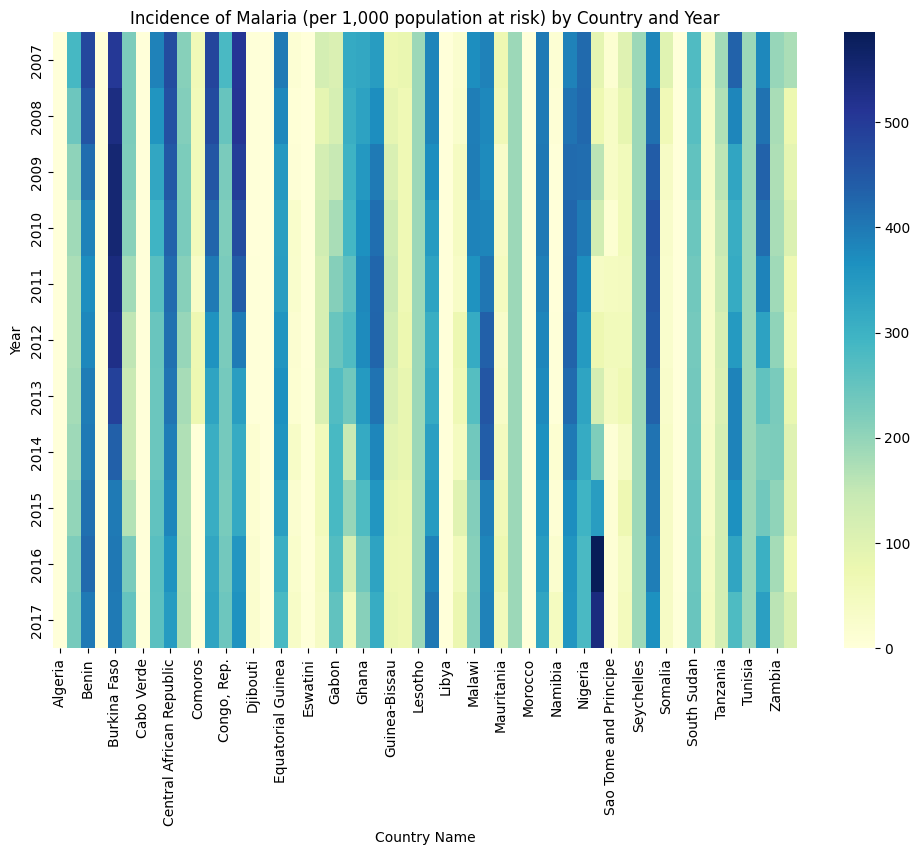

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

incidence = malaria[['countryname', 'year', 'iom(/1,000 pop)']]

# Group by country and year, calculate the mean incidence of malaria
mean_malaria_incidence = incidence.groupby(['countryname', 'year']).mean().reset_index()

# Pivot the table for better visualization
pivot_table = mean_malaria_incidence.pivot(index='year',columns= 'countryname', values='iom(/1,000 pop)')

# Plotting
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='YlGnBu')
plt.title('Incidence of Malaria (per 1,000 population at risk) by Country and Year')
plt.xlabel('Country Name')
plt.ylabel('Year')
plt.show()

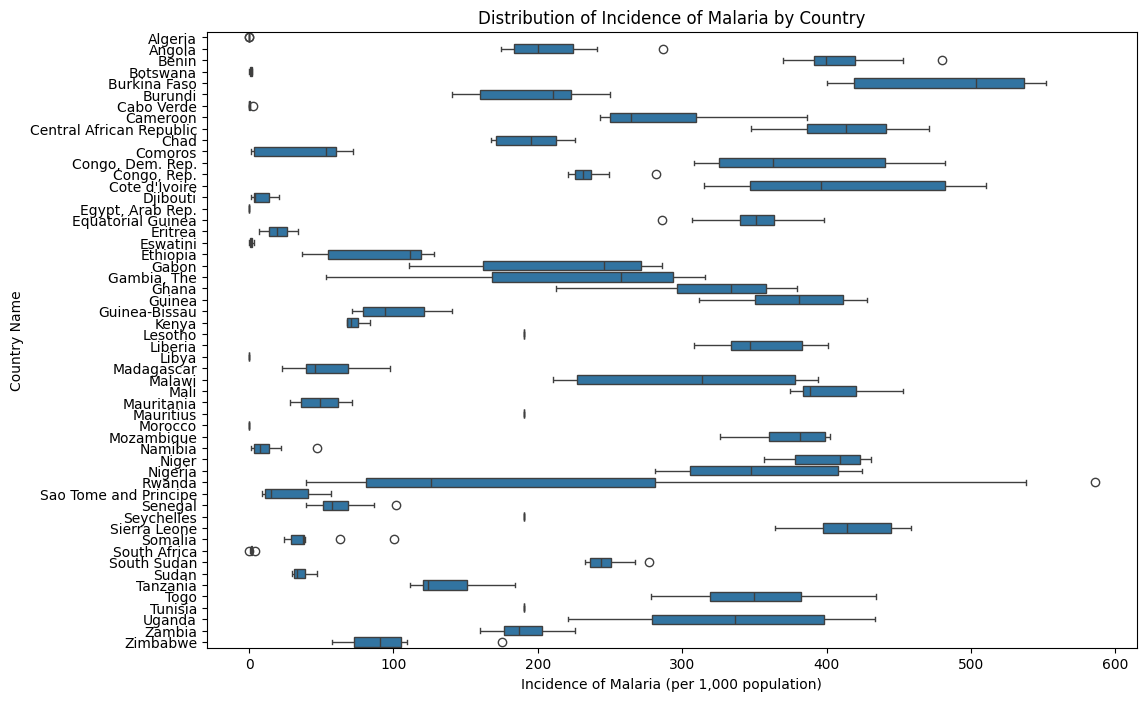

In [48]:
# Calculate summary statistics
iom_stats = malaria.groupby('countryname')['iom(/1,000 pop)'].describe()

# Plotting the distribution of IOM by country
plt.figure(figsize=(12, 8))
sns.boxplot(x='iom(/1,000 pop)', y='countryname', data=malaria, orient='h')
plt.xlabel('Incidence of Malaria (per 1,000 population)')
plt.ylabel('Country Name')
plt.title('Distribution of Incidence of Malaria by Country')
plt.show()

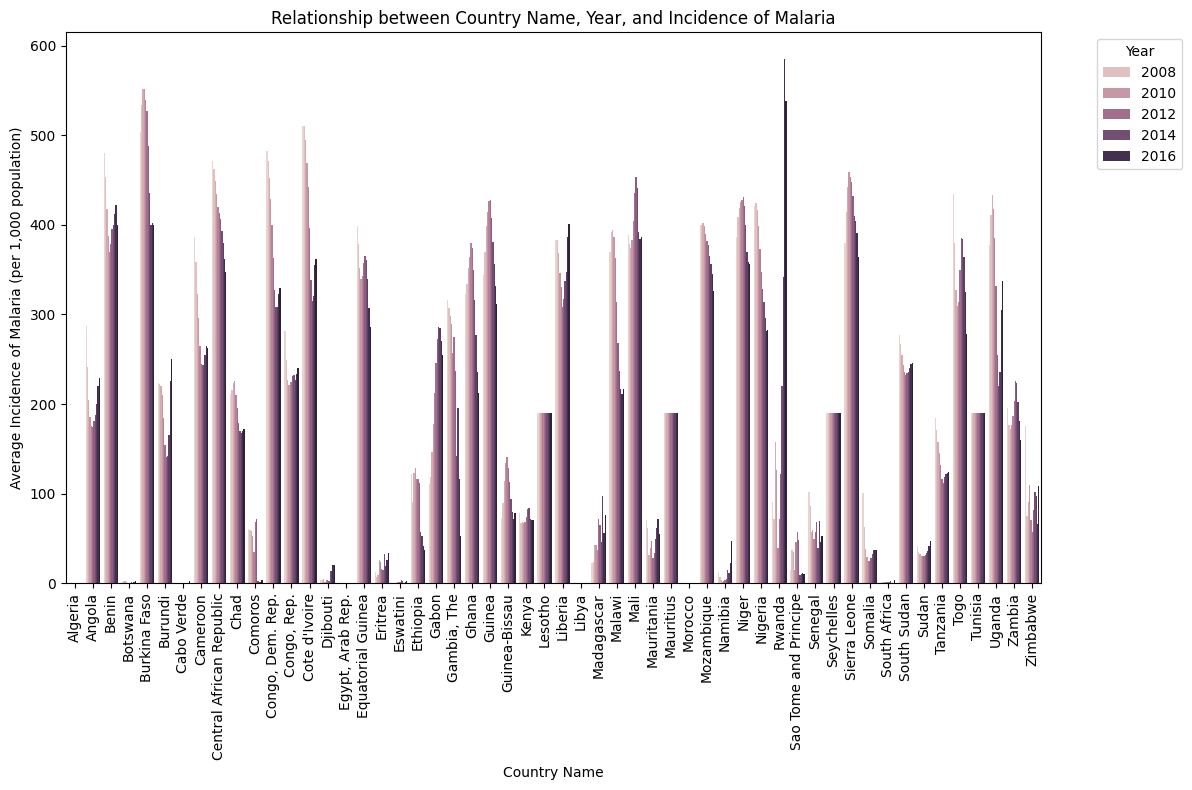

In [56]:
# Plotting the relationship between country name, year, and IOM using bar plots
plt.figure(figsize=(12, 8))
sns.barplot(x='countryname', y='iom(/1,000 pop)', hue='year', data=malaria, errorbar=None,dodge=True)
plt.xlabel('Country Name')
plt.ylabel('Average Incidence of Malaria (per 1,000 population)')
plt.title('Relationship between Country Name, Year, and Incidence of Malaria')
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

2. Relation between incidence of malaria and basic water service

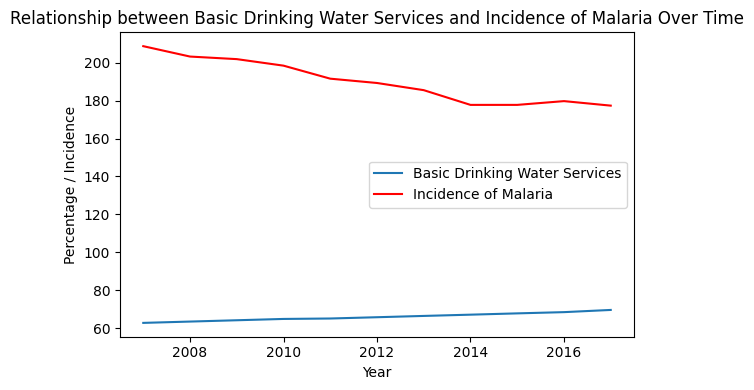

In [67]:
# Filter relevant columns
relevant_columns = ['year', 'iom(/1,000 pop)', 'basicdrinkingwaterservices(%pop)']
filtered_df = malaria[relevant_columns].dropna()  # Drop rows with missing values

# Group by year and calculate the mean values
mean_values = filtered_df.groupby('year').mean().reset_index()

# Plotting the relationship between basic drinking water services and malaria incidence over time
plt.figure(figsize=(6, 4))

# Line plot for basic drinking water services
sns.lineplot(x='year', y='basicdrinkingwaterservices(%pop)', data=mean_values, label='Basic Drinking Water Services')

# Line plot for malaria incidence
sns.lineplot(x='year', y='iom(/1,000 pop)', data=mean_values, color='red', label='Incidence of Malaria')

plt.xlabel('Year')
plt.ylabel('Percentage / Incidence')
plt.title('Relationship between Basic Drinking Water Services and Incidence of Malaria Over Time')
plt.legend()
plt.tight_layout()
plt.show()


Inference - This clearly shows that there is a decrease in incidence of malaria with the incresae in basic drinking water needs.

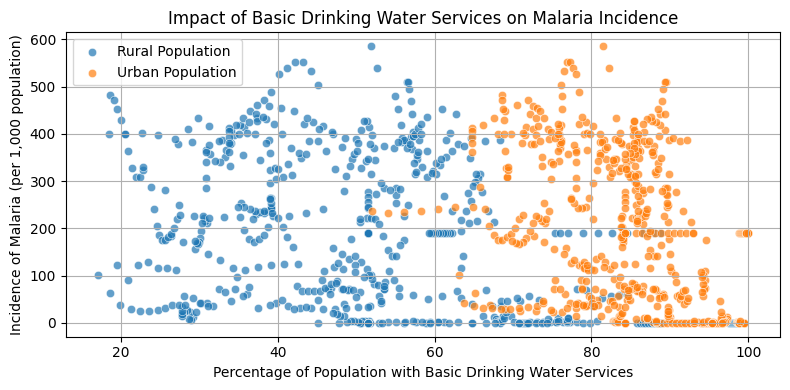

In [70]:
# Filter relevant columns for analysis
water_data = malaria[['countryname', 'iom(/1,000 pop)', 'basicdrinkingwaterservices(%pop)', 'basicdrinkingwater_rural(%ruralpop)', 'basicdrinkingwater_urban(%urbanpop)']]

# Calculate the average incidence of malaria for each country
avg_malaria_incidence = water_data.groupby('countryname')['iom(/1,000 pop)'].mean().reset_index()

# Plotting the relationship between basic drinking water services and malaria incidence
plt.figure(figsize=(8, 4))

# Scatter plot for rural population
sns.scatterplot(x='basicdrinkingwater_rural(%ruralpop)', y='iom(/1,000 pop)', data=water_data, label='Rural Population', alpha=0.7)

# Scatter plot for urban population
sns.scatterplot(x='basicdrinkingwater_urban(%urbanpop)', y='iom(/1,000 pop)', data=water_data, label='Urban Population', alpha=0.7)

plt.xlabel('Percentage of Population with Basic Drinking Water Services')
plt.ylabel('Incidence of Malaria (per 1,000 population)')
plt.title('Impact of Basic Drinking Water Services on Malaria Incidence')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


The above scatter plot shows the percentage of population with basic drinking water as you can see rural area have less basic drinking water services whereas the services on the urban population are much greater than that but the incidence cases of Malaria are the same. This shows even though the problem of malaria is there on both rular and urban area but basic drinking water service is not the same.

And we already know that water service is essential for reducing the incidence of malaria.

3. Relation between incidence of malaria and basic sanitation services

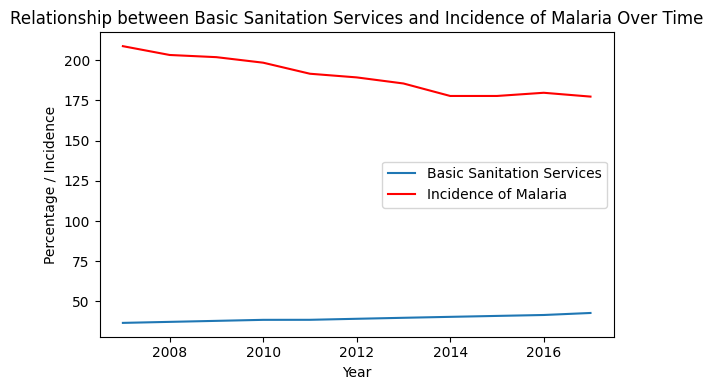

In [68]:
# Filter relevant columns
relevant_columns = ['year', 'iom(/1,000 pop)', 'bascisanitationservices(%pop)']
filtered_df = malaria[relevant_columns].dropna()  # Drop rows with missing values

# Group by year and calculate the mean values
mean_values = filtered_df.groupby('year').mean().reset_index()

# Plotting the relationship between basic sanitation services and malaria incidence over time
plt.figure(figsize=(6, 4))

# Line plot for basic sanitation services
sns.lineplot(x='year', y='bascisanitationservices(%pop)', data=mean_values, label='Basic Sanitation Services')

# Line plot for malaria incidence
sns.lineplot(x='year', y='iom(/1,000 pop)', data=mean_values, color='red', label='Incidence of Malaria')

plt.xlabel('Year')
plt.ylabel('Percentage / Incidence')
plt.title('Relationship between Basic Sanitation Services and Incidence of Malaria Over Time')
plt.legend()
plt.tight_layout()
plt.show()


Inference - This shows that there is also a indirect proportionality between incidence of malaria and Basic sanitation service.

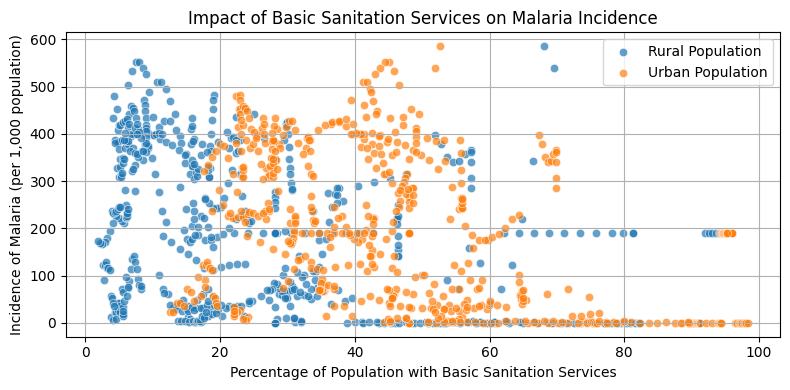

In [71]:
# Filter relevant columns for analysis
sanitation_data = malaria[['countryname', 'iom(/1,000 pop)', 'bascisanitationservices(%pop)', 'bascisanitationservices_rural(%ruralpop)', 'bascisanitationservices_urban(%urbanpop)']]

# Calculate the average incidence of malaria for each country
avg_malaria_incidence = sanitation_data.groupby('countryname')['iom(/1,000 pop)'].mean().reset_index()

# Plotting the relationship between basic sanitation services and malaria incidence
plt.figure(figsize=(8, 4))

# Scatter plot for rural population
sns.scatterplot(x='bascisanitationservices_rural(%ruralpop)', y='iom(/1,000 pop)', data=sanitation_data, label='Rural Population', alpha=0.7)

# Scatter plot for urban population
sns.scatterplot(x='bascisanitationservices_urban(%urbanpop)', y='iom(/1,000 pop)', data=sanitation_data, label='Urban Population', alpha=0.7)

plt.xlabel('Percentage of Population with Basic Sanitation Services')
plt.ylabel('Incidence of Malaria (per 1,000 population)')
plt.title('Impact of Basic Sanitation Services on Malaria Incidence')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


The above scatter plot shows that rural population have less percentage of population with basic sanitation sevices compared to rural. But as a whole we can see even the percentage of urban population is very less with basic sanitage services.

4. Relation between urban and rural population growth over the years

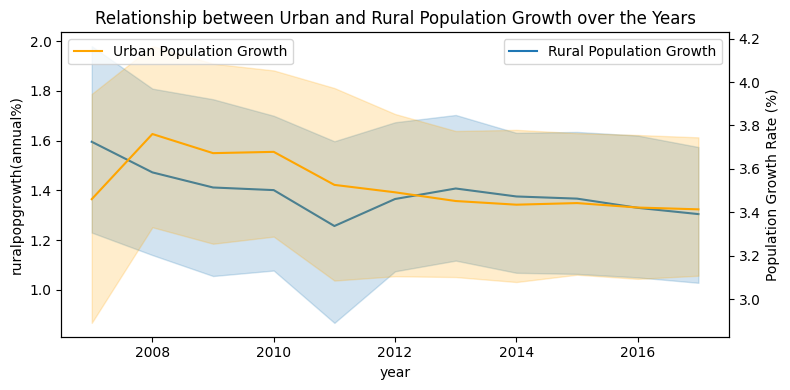

In [73]:
# Filter relevant columns
relevant_columns = ['year', 'ruralpopgrowth(annual%)', 'urbanpopgrowth(annual%)']
population_growth_df = malaria[relevant_columns].dropna()  # Drop rows with missing values

# Plotting the relationship between urban and rural population growth over the years
plt.figure(figsize=(8, 4))

# Line plot for rural population growth
sns.lineplot(x='year', y='ruralpopgrowth(annual%)', data=population_growth_df, label='Rural Population Growth')

# Create a secondary y-axis for urban population growth
plt.twinx()
sns.lineplot(x='year', y='urbanpopgrowth(annual%)', data=population_growth_df, color='orange', label='Urban Population Growth')

plt.xlabel('Year')
plt.ylabel('Population Growth Rate (%)')
plt.title('Relationship between Urban and Rural Population Growth over the Years')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


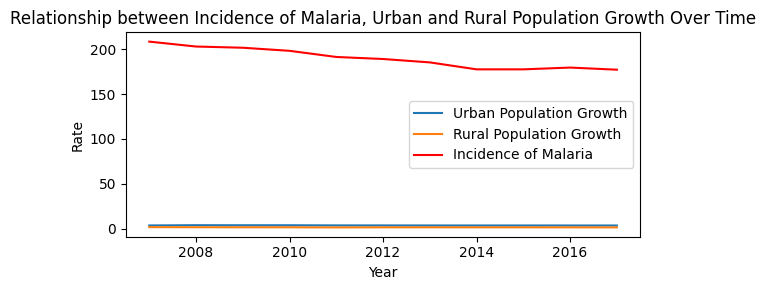

In [78]:
# Filter relevant columns for analysis
relevant_columns = ['year', 'iom(/1,000 pop)', 'urbanpopgrowth(annual%)','ruralpopgrowth(annual%)']
malaria_urban_data = malaria[relevant_columns].dropna()  # Drop rows with missing values

# Group by year and calculate the mean values
mean_values = malaria_urban_data.groupby('year').mean().reset_index()

# Plotting the relationship between incidence of malaria and urban population growth over time
plt.figure(figsize=(6, 3))

# Line plot for urban population growth
sns.lineplot(x='year', y='urbanpopgrowth(annual%)', data=mean_values, label='Urban Population Growth')

# Line plot for rural population growth
sns.lineplot(x='year', y='ruralpopgrowth(annual%)', data=mean_values, label='Rural Population Growth')

# Line plot for incidence of malaria
sns.lineplot(x='year', y='iom(/1,000 pop)', data=mean_values, color='red', label='Incidence of Malaria')

plt.xlabel('Year')
plt.ylabel('Rate')
plt.title('Relationship between Incidence of Malaria, Urban and Rural Population Growth Over Time')
plt.legend()
plt.tight_layout()
plt.show()


There is no relevant relation between growth and incidence of Malaria

Trying to get a relation between Malaria Cases eported over the countries in Africa and getting to know more about which countries are in a much needed investigation soon


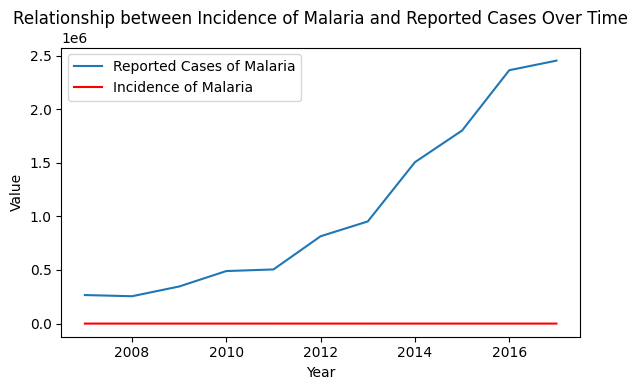

In [80]:
# Filter relevant columns for analysis
relevant_columns = ['year', 'iom(/1,000 pop)', 'malariacasesreported']
malaria_cases_data = malaria[relevant_columns].dropna()  # Drop rows with missing values

# Group by year and calculate the mean values
mean_values = malaria_cases_data.groupby('year').mean().reset_index()

# Plotting the relationship between incidence of malaria and reported cases over time
plt.figure(figsize=(6, 4))

# Line plot for reported cases of malaria
sns.lineplot(x='year', y='malariacasesreported', data=mean_values, label='Reported Cases of Malaria')

# Line plot for incidence of malaria
sns.lineplot(x='year', y='iom(/1,000 pop)', data=mean_values, color='red', label='Incidence of Malaria')

plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Relationship between Incidence of Malaria and Reported Cases Over Time')
plt.legend()
plt.tight_layout()
plt.show()


The above line plot shows that over time the reported cases of malaria has increased drastically.

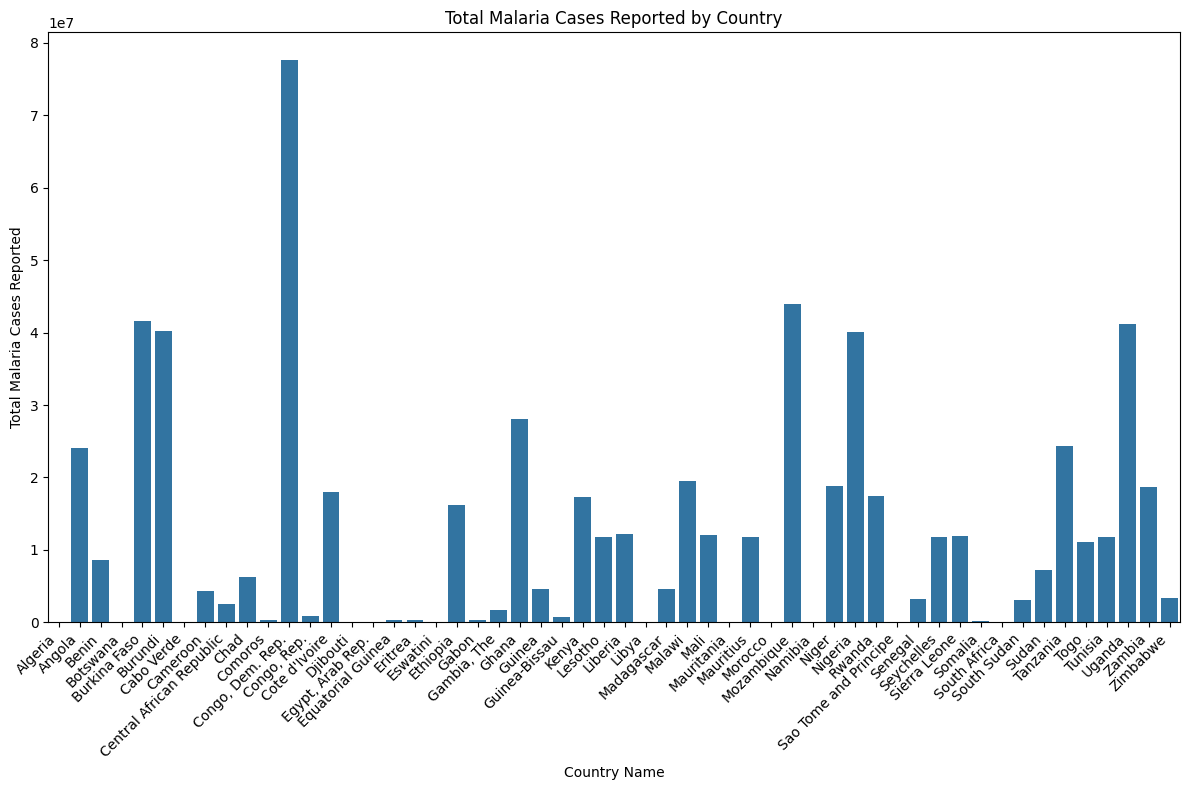

In [89]:

# Group by country and calculate the total malaria cases reported for each country
total_malaria_cases = malaria.groupby('countryname')['malariacasesreported'].sum().reset_index()

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(x='countryname', y='malariacasesreported', data=total_malaria_cases)
plt.xlabel('Country Name')
plt.ylabel('Total Malaria Cases Reported')
plt.title('Total Malaria Cases Reported by Country')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


This shows that the reported malaria cases over different countries.

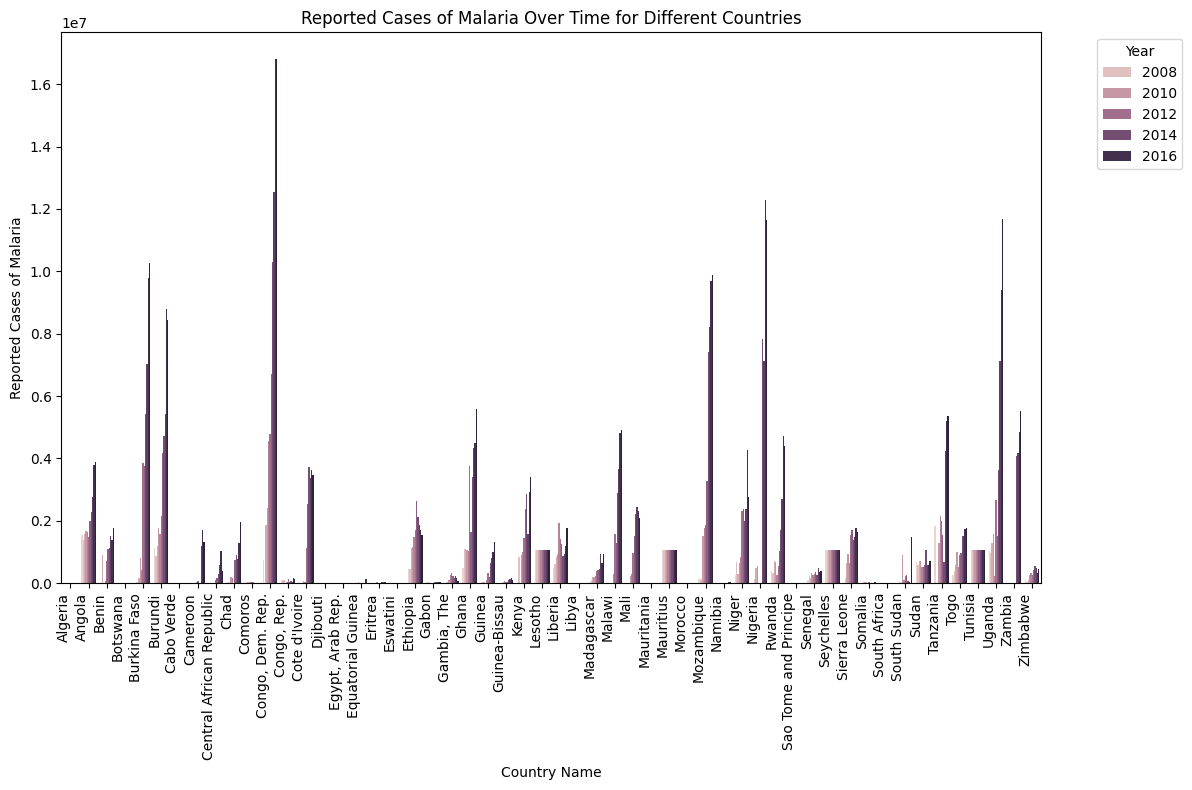

In [88]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Filter relevant columns for analysis
relevant_columns = ['countryname', 'year', 'iom(/1,000 pop)', 'malariacasesreported']
malaria_country_data = malaria[relevant_columns].dropna()  # Drop rows with missing values

# Group by country and year and calculate the mean values
mean_values = malaria_country_data.groupby(['countryname', 'year']).mean().reset_index()

# Plotting the relationship between incidence of malaria and reported cases over time for different countries
plt.figure(figsize=(12, 8))

# Bar plot for reported cases of malaria for each year
sns.barplot(x='countryname', y='malariacasesreported', hue='year', data=mean_values)

plt.xlabel('Country Name')
plt.ylabel('Reported Cases of Malaria')
plt.title('Reported Cases of Malaria Over Time for Different Countries')
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


Shows which countries had most reported cases increased over time
